<a href="https://colab.research.google.com/github/jmaritar/neural-network/blob/master/src/04_hamburguesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de Hamburguesas

Para construir una hamburguesa necesitamos de cuatro ingredientes fundamentales: pan, carne, lechuga y tomate. Si deseamos añadir más elementos como queso, tocino, cebolla, pepinillos, mostaza, ketchup, mayonesa, entre otros, necesitaremos incluir más ingredientes a nuestra receta. De esta manera, nuestra hamburguesa podrá tener más variedad de sabores y texturas para satisfacer diferentes gustos y preferencias culinarias. Además, el uso de ingredientes adicionales nos permite crear combinaciones únicas y personalizadas que hacen que cada hamburguesa sea especial y única.

## Capas de la Red Neuronal

1. **Capa de entrada:** Un vector de 4 elementos representando los ingredientes básicos.
    - X1 = Pan
    - X2 = Carne
    - X3 = Lechuga
    - X4 = Tomate

2. **Capa oculta:** 7 neuronas representando ingredientes adicionales.
    - Y1 = Queso
    - Y2 = Tocino
    - Y3 = Cebolla
    - Y4 = Pepinillos
    - Y5 = Mostaza
    - Y6 = Ketchup
    - Y7 = Mayonesa

3. **Capa de salida:** 2 neuronas representando la clasificación de la hamburguesa.
    - S1 = Hamburguesa Clásica
    - S2 = Hamburguesa Especial

## Conexiones de la Red Neuronal

Las conexiones entre las capas se representan mediante matrices de pesos.

### De la capa de entrada a la capa oculta

$$
\begin{bmatrix}
0.5 & 0.4 & 0.3 & 0.2 \\
0.4 & 0.3 & 0.2 & 0.1 \\
0.3 & 0.2 & 0.1 & 0.1 \\
0.2 & 0.1 & 0.1 & 0.1 \\
0.1 & 0.1 & 0.1 & 0.1 \\
0.1 & 0.1 & 0.1 & 0.1 \\
0.1 & 0.1 & 0.1 & 0.1 \\
\end{bmatrix}
$$

### De la capa oculta a la capa de salida

$$
\begin{bmatrix}
0.2 & 0.3 \\
0.2 & 0.3 \\
0.2 & 0.3 \\
0.2 & 0.3 \\
0.2 & 0.3 \\
0.2 & 0.3 \\
0.2 & 0.3 \\
\end{bmatrix}
$$

## Calculando los Pesos

Para obtener una hamburguesa clásica, necesitamos:
- 40 gr de Pan (X1)
- 50 gr de Carne (X2)
- 20 gr de Lechuga (X3)
- 10 gr de Tomate (X4)
- 10 gr de un ingrediente adicional (Y1)
Para obtener una hamburguesa especial, necesitamos:
- 40 gr de Pan (X1)
- 50 gr de Carne (X2)
- 20 gr de Lechuga (X3)
- 10 gr de Tomate (X4)
- 30 gr de uno o más ingredientes adicionales (Y1/Y2/Y3/Y4/Y5/Y6/Y7)

Los pesos se calculan así:

Para una hamburguesa clásica:
- X1 * 0.5 * 40 = 20
- X2 * 0.4 * 50 = 20
- X3 * 0.3 * 20 = 6
- X4 * 0.2 * 10 = 2
- Y1 * 0.2 * 10 = 2

Total = 20 + 20 + 6 + 2 + 2 = 50

Para una hamburguesa especial:
- Y1 * 0.2 * 30 = 6 (para cada ingrediente adicional)


ToggleButtons(description='Pan', index=1, options=('No', 'Sí'), value='Sí')

ToggleButtons(description='Carne', index=1, options=('No', 'Sí'), value='Sí')

ToggleButtons(description='Lechuga', index=1, options=('No', 'Sí'), value='Sí')

ToggleButtons(description='Tomate', index=1, options=('No', 'Sí'), value='Sí')

ToggleButtons(description='Queso', index=1, options=('No', 'Sí'), value='Sí')

ToggleButtons(description='Tocino', options=('No', 'Sí'), value='No')

ToggleButtons(description='Cebolla', options=('No', 'Sí'), value='No')

ToggleButtons(description='Pepinillos', index=1, options=('No', 'Sí'), value='Sí')

ToggleButtons(description='Mostaza', options=('No', 'Sí'), value='No')

ToggleButtons(description='Ketchup', options=('No', 'Sí'), value='No')

ToggleButtons(description='Mayonesa', options=('No', 'Sí'), value='No')

Button(description='Clasificar Hamburguesa', style=ButtonStyle())

Valores: Pan=48.0, Ingredientes Adicionales=4.0, Resultado del cálculo: 52.0
El tipo de hamburguesa es: Hamburguesa Especial
Valores: Pan=48.0, Ingredientes Adicionales=4.0, Resultado del cálculo: 52.0


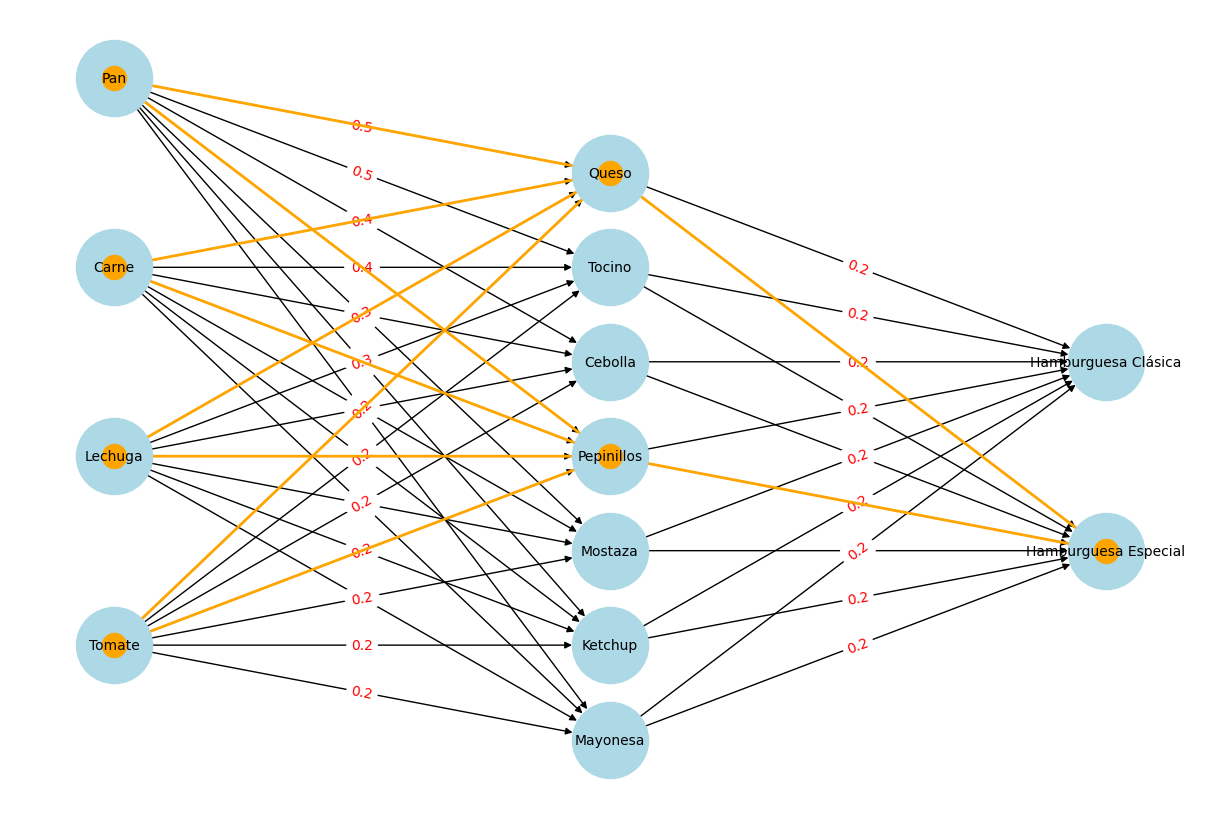

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, clear_output
import ipywidgets as widgets

# Pesos de los ingredientes
pesos_entrada = np.array([0.5, 0.4, 0.3, 0.2])
pesos_ocultos = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

# Función para calcular el resultado de la red neuronal
def calcular_resultado(ingredientes_base, ingredientes_adicionales):
    x = np.array([ingredientes_base['pan'], ingredientes_base['carne'], ingredientes_base['lechuga'], ingredientes_base['tomate']])
    y = np.array([ingredientes_adicionales['queso'], ingredientes_adicionales['tocino'], ingredientes_adicionales['cebolla'],
                  ingredientes_adicionales['pepinillos'], ingredientes_adicionales['mostaza'], ingredientes_adicionales['ketchup'],
                  ingredientes_adicionales['mayonesa']])
    valor_entrada = np.dot(pesos_entrada, x)
    valor_oculto = np.dot(pesos_ocultos, y)
    resultado = valor_entrada + valor_oculto
    print(f"Valores: Pan={valor_entrada}, Ingredientes Adicionales={valor_oculto}, Resultado del cálculo: {resultado}")
    return resultado

# Función para determinar el tipo de hamburguesa
def tipo_de_hamburguesa(resultado):
    if resultado == 50:
        return "Hamburguesa Clásica"
    elif resultado > 50:
        return "Hamburguesa Especial"
    else:
        return "No es una hamburguesa válida"

# Función para visualizar la red neuronal
def visualizar_red(ingredientes_base, ingredientes_adicionales):
    G = nx.DiGraph()
    edges = [
        ('Pan', 'Queso', pesos_entrada[0]), ('Pan', 'Tocino', pesos_entrada[0]), ('Pan', 'Cebolla', pesos_entrada[0]), ('Pan', 'Pepinillos', pesos_entrada[0]),
        ('Pan', 'Mostaza', pesos_entrada[0]), ('Pan', 'Ketchup', pesos_entrada[0]), ('Pan', 'Mayonesa', pesos_entrada[0]),
        ('Carne', 'Queso', pesos_entrada[1]), ('Carne', 'Tocino', pesos_entrada[1]), ('Carne', 'Cebolla', pesos_entrada[1]), ('Carne', 'Pepinillos', pesos_entrada[1]),
        ('Carne', 'Mostaza', pesos_entrada[1]), ('Carne', 'Ketchup', pesos_entrada[1]), ('Carne', 'Mayonesa', pesos_entrada[1]),
        ('Lechuga', 'Queso', pesos_entrada[2]), ('Lechuga', 'Tocino', pesos_entrada[2]), ('Lechuga', 'Cebolla', pesos_entrada[2]), ('Lechuga', 'Pepinillos', pesos_entrada[2]),
        ('Lechuga', 'Mostaza', pesos_entrada[2]), ('Lechuga', 'Ketchup', pesos_entrada[2]), ('Lechuga', 'Mayonesa', pesos_entrada[2]),
        ('Tomate', 'Queso', pesos_entrada[3]), ('Tomate', 'Tocino', pesos_entrada[3]), ('Tomate', 'Cebolla', pesos_entrada[3]), ('Tomate', 'Pepinillos', pesos_entrada[3]),
        ('Tomate', 'Mostaza', pesos_entrada[3]), ('Tomate', 'Ketchup', pesos_entrada[3]), ('Tomate', 'Mayonesa', pesos_entrada[3]),
        ('Queso', 'Hamburguesa Clásica', pesos_ocultos[0]), ('Queso', 'Hamburguesa Especial', pesos_ocultos[0]),
        ('Tocino', 'Hamburguesa Clásica', pesos_ocultos[1]), ('Tocino', 'Hamburguesa Especial', pesos_ocultos[1]),
        ('Cebolla', 'Hamburguesa Clásica', pesos_ocultos[2]), ('Cebolla', 'Hamburguesa Especial', pesos_ocultos[2]),
        ('Pepinillos', 'Hamburguesa Clásica', pesos_ocultos[3]), ('Pepinillos', 'Hamburguesa Especial', pesos_ocultos[3]),
        ('Mostaza', 'Hamburguesa Clásica', pesos_ocultos[4]), ('Mostaza', 'Hamburguesa Especial', pesos_ocultos[4]),
        ('Ketchup', 'Hamburguesa Clásica', pesos_ocultos[5]), ('Ketchup', 'Hamburguesa Especial', pesos_ocultos[5]),
        ('Mayonesa', 'Hamburguesa Clásica', pesos_ocultos[6]), ('Mayonesa', 'Hamburguesa Especial', pesos_ocultos[6])
    ]
    G.add_weighted_edges_from(edges)
    pos = {
        'Pan': (0, 6), 'Carne': (0, 5), 'Lechuga': (0, 4), 'Tomate': (0, 3),
        'Queso': (1, 5.5), 'Tocino': (1, 5), 'Cebolla': (1, 4.5), 'Pepinillos': (1, 4), 'Mostaza': (1, 3.5), 'Ketchup': (1, 3), 'Mayonesa': (1, 2.5),
        'Hamburguesa Clásica': (2, 4.5), 'Hamburguesa Especial': (2, 3.5)
    }

    # Determinar los nodos activados
    activaciones = ['Pan' if ingredientes_base['pan'] > 0 else None,
                    'Carne' if ingredientes_base['carne'] > 0 else None,
                    'Lechuga' if ingredientes_base['lechuga'] > 0 else None,
                    'Tomate' if ingredientes_base['tomate'] > 0 else None]
    activaciones += [ing.capitalize() for ing, val in ingredientes_adicionales.items() if val > 0]
    activaciones = list(filter(None, activaciones))

    tipo_hamburguesa = tipo_de_hamburguesa(calcular_resultado(ingredientes_base, ingredientes_adicionales))
    if tipo_hamburguesa != "No es una hamburguesa válida":
        activaciones.append(tipo_hamburguesa)

    # Dibujar la red neuronal
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, arrows=True)
    edge_labels = {(u, v): f'{d["weight"]:.1f}' for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    # Resaltar nodos y conexiones activadas
    activated_edges = [(u, v) for u, v, d in G.edges(data=True) if u in activaciones and v in activaciones]
    nx.draw_networkx_edges(G, pos, edgelist=activated_edges, edge_color='orange', width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=activaciones, node_color='orange')

    plt.show()

# Interfaz de usuario para cambiar los valores
pan_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Pan', value='Sí')
carne_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Carne', value='Sí')
lechuga_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Lechuga', value='Sí')
tomate_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Tomate', value='Sí')
queso_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Queso', value='Sí')
tocino_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Tocino', value='No')
cebolla_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Cebolla', value='No')
pepinillos_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Pepinillos', value='No')
mostaza_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Mostaza', value='No')
ketchup_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Ketchup', value='No')
mayonesa_toggle = widgets.ToggleButtons(options=['No', 'Sí'], description='Mayonesa', value='No')
button = widgets.Button(description='Clasificar Hamburguesa')

# Función de manejo del botón
def on_button_clicked(b):
    clear_output(wait=True)
    display(pan_toggle, carne_toggle, lechuga_toggle, tomate_toggle, queso_toggle, tocino_toggle, cebolla_toggle, pepinillos_toggle, mostaza_toggle, ketchup_toggle, mayonesa_toggle, button)
    ingredientes_base = {
        "pan": 40 if pan_toggle.value == 'Sí' else 0,
        "carne": 50 if carne_toggle.value == 'Sí' else 0,
        "lechuga": 20 if lechuga_toggle.value == 'Sí' else 0,
        "tomate": 10 if tomate_toggle.value == 'Sí' else 0
    }
    ingredientes_adicionales = {
        "queso": 10 if queso_toggle.value == 'Sí' else 0,
        "tocino": 25 if tocino_toggle.value == 'Sí' else 0,
        "cebolla": 15 if cebolla_toggle.value == 'Sí' else 0,
        "pepinillos": 10 if pepinillos_toggle.value == 'Sí' else 0,
        "mostaza": 5 if mostaza_toggle.value == 'Sí' else 0,
        "ketchup": 5 if ketchup_toggle.value == 'Sí' else 0,
        "mayonesa": 5 if mayonesa_toggle.value == 'Sí' else 0
    }
    resultado = calcular_resultado(ingredientes_base, ingredientes_adicionales)
    tipo_hamburguesa = tipo_de_hamburguesa(resultado)
    print(f"El tipo de hamburguesa es: {tipo_hamburguesa}")
    visualizar_red(ingredientes_base, ingredientes_adicionales)

button.on_click(on_button_clicked)

# Mostrar la interfaz
display(pan_toggle, carne_toggle, lechuga_toggle, tomate_toggle, queso_toggle, tocino_toggle, cebolla_toggle, pepinillos_toggle, mostaza_toggle, ketchup_toggle, mayonesa_toggle, button)